**2. Exploratory Data Analysis и линейная регрессия**


In [77]:
!pip install folium


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

In [79]:
import numpy as np
import pandas as pd
import matplotlib as plt

Будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview). Нужно предсказать длительность поездки на такси

In [80]:
df = pd.read_csv("train.csv")

In [81]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [82]:
df = df.drop(columns=["dropoff_datetime"])

In [84]:
from datetime import datetime

df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

Распределение таргета в обучающей выборке

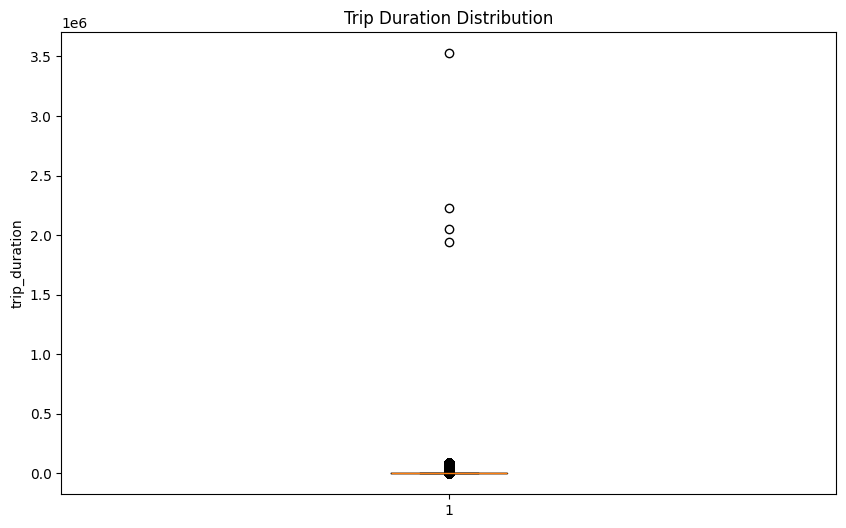

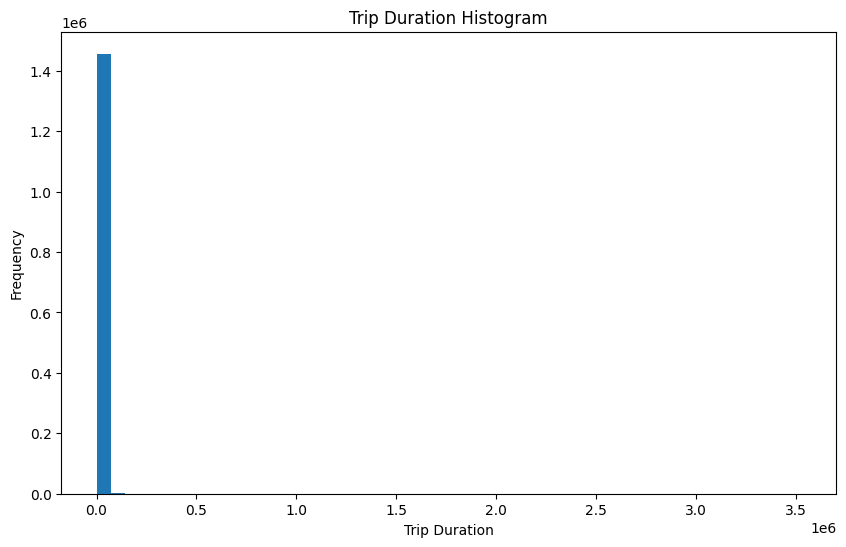

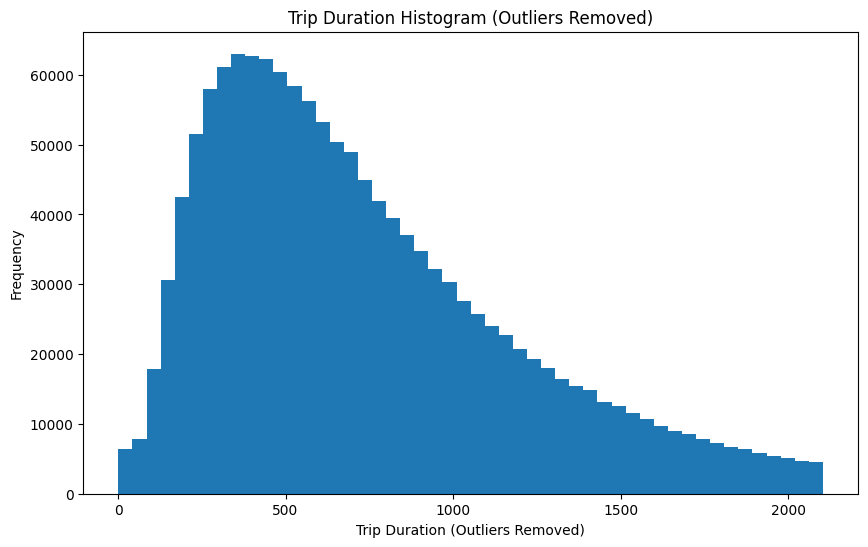

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.boxplot(df['trip_duration'])
plt.ylabel('trip_duration')
plt.title('Trip Duration Distribution')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['trip_duration'], bins=50)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Trip Duration Histogram')
plt.show()

threshold = df['trip_duration'].quantile(0.95)
filtered_data = df[df['trip_duration'] <= threshold]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['trip_duration'], bins=50)
plt.xlabel('Trip Duration (Outliers Removed)')
plt.ylabel('Frequency')
plt.title('Trip Duration Histogram (Outliers Removed)')
plt.show()

1) Целевая переменная имеет скошенное распределение с сильным сдвигом к меньшим значениям (влево) и несколькими крупными выбросами
2) Без учета выбросов, распределение становится более симметричным, внешне похожим на логнормальное


$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \log{(\exp(\hat{a}(x_i)) - 1 + 1)}\big)^2}$$

$$= \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2}$$


In [87]:
df["log_trip_duration"] = np.log1p(df["trip_duration"])
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642


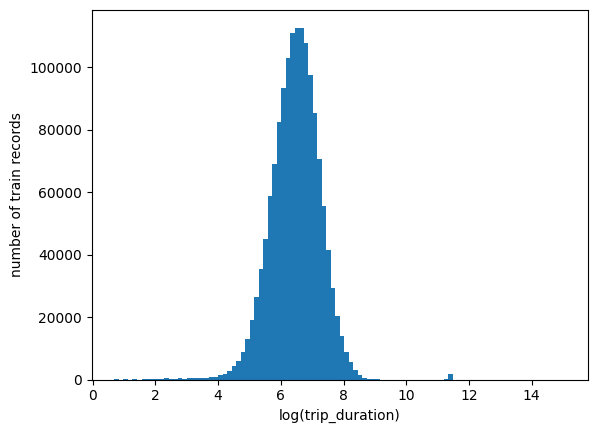

In [88]:
plt.hist(df['log_trip_duration'], bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

Значение метрики при наилучшем константном предсказании:

In [90]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))

log1p_y_true = df['log_trip_duration'].values


best_constant_pred = np.mean(log1p_y_true)
log1p_y_pred = np.full(log1p_y_true.shape, best_constant_pred)

rmsle_best_const = rmsle(log1p_y_true, log1p_y_pred)

print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


График зависимости количества поездок от дня в году:

In [91]:
df['pickup_date'] = df['pickup_datetime'].dt.date

In [92]:

df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26


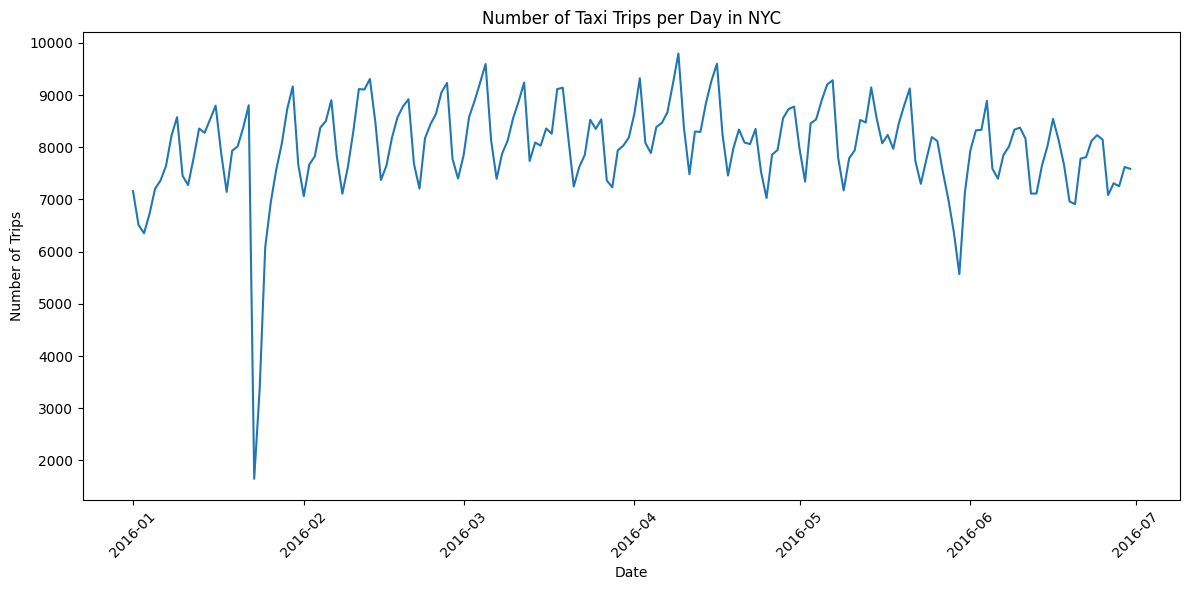

In [93]:

trips_per_day = df.groupby('pickup_date').size()

plt.figure(figsize=(12, 6))
plt.plot(trips_per_day.index, trips_per_day.values)
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Number of Taxi Trips per Day in NYC")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:

local_minimums = trips_per_day[(trips_per_day.shift(1) > trips_per_day) & (trips_per_day.shift(-1) > trips_per_day)]

significant_minimums = local_minimums[local_minimums.diff().abs() > 30].nsmallest(2)
significant_minimums

pickup_date
2016-01-23    1648
2016-05-30    5570
dtype: int64

In [95]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,day_of_week
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,2
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,5


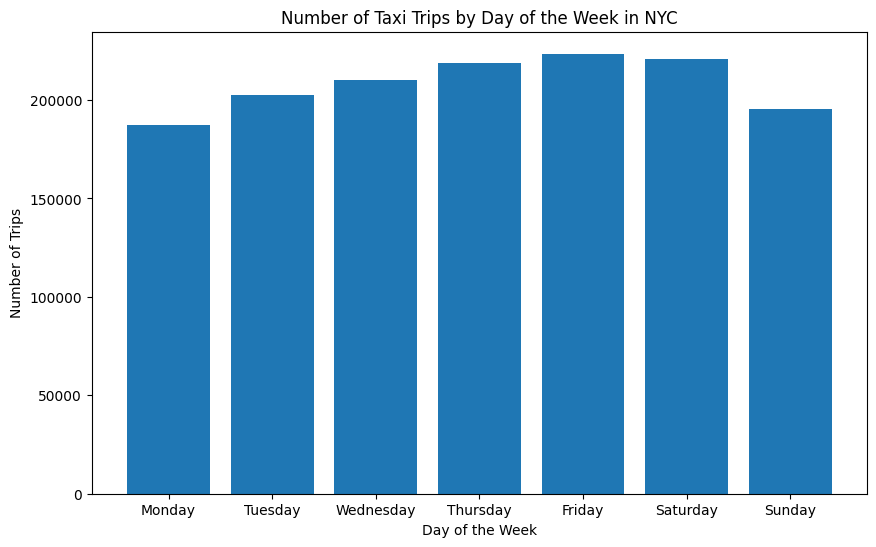

In [96]:

trips_per_day_of_week = df.groupby('day_of_week').size()


day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
trips_per_day_of_week.index = trips_per_day_of_week.index.map(day_names)

plt.figure(figsize=(10, 6))
plt.bar(trips_per_day_of_week.index, trips_per_day_of_week.values)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.title("Number of Taxi Trips by Day of the Week in NYC")
plt.show()

In [97]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour

df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,day_of_week,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,0,17
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,6,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,1,11
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,2,19
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,5,13


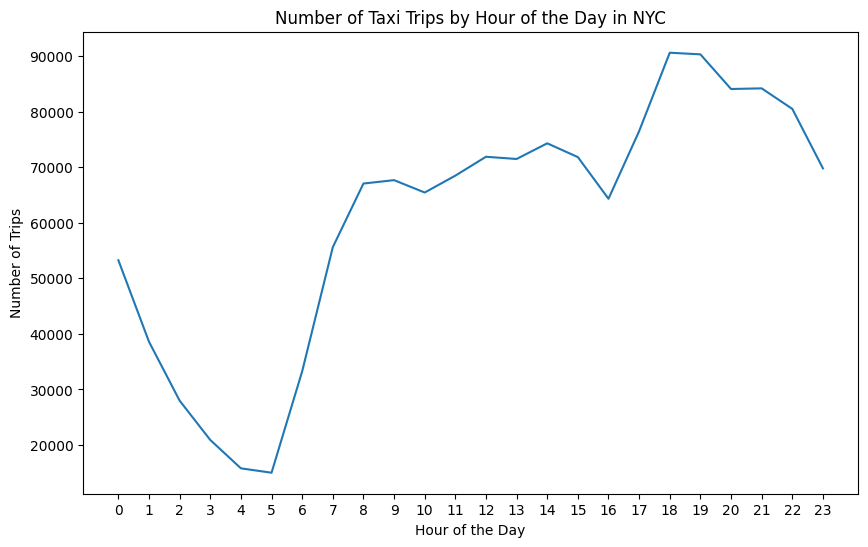

In [98]:
trips_per_hour = df.groupby('pickup_hour').size()

plt.figure(figsize=(10, 6))
plt.plot(trips_per_hour)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Taxi Trips by Hour of the Day in NYC")
plt.xticks(range(0, 24))
plt.show()

Графики зависимости количества поездок от часа в сутках для разных месяцев и количества поездок от часа в сутках для разных дней недели.

In [99]:

df['pickup_month'] = df['pickup_datetime'].dt.month
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,day_of_week,pickup_hour,pickup_month
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,0,17,3
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,6,0,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,1,11,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,2,19,4
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,5,13,3


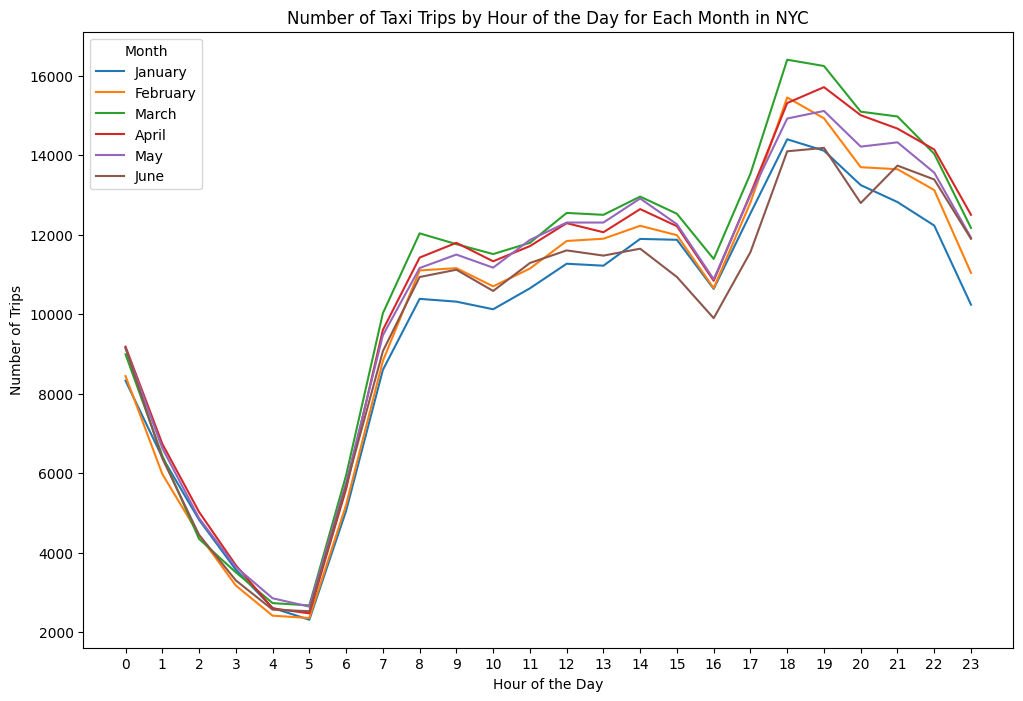

In [100]:

trips_per_hour_month = df.groupby(['pickup_month', 'pickup_hour']).size().unstack()

month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

plt.figure(figsize=(12, 8))
for month in trips_per_hour_month.index:
    plt.plot(trips_per_hour_month.columns, trips_per_hour_month.loc[month], label=month_names[month - 1])

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Taxi Trips by Hour of the Day for Each Month in NYC")
plt.xticks(range(0, 24))
plt.legend(title="Month")

plt.show()



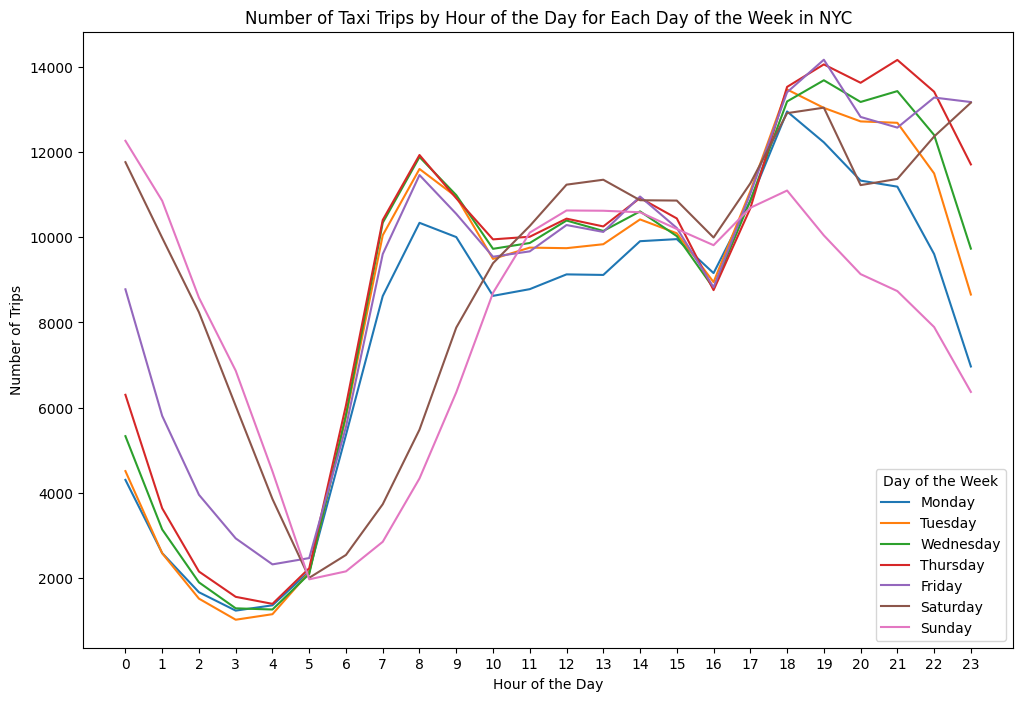

In [101]:
trips_per_hour_weekday = df.groupby(['day_of_week', 'pickup_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in trips_per_hour_weekday.index:
    plt.plot(trips_per_hour_weekday.columns, trips_per_hour_weekday.loc[day], label=day_names[day])

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Taxi Trips by Hour of the Day for Each Day of the Week in NYC")
plt.xticks(range(0, 24))
plt.legend(title="Day of the Week")

plt.show()



Несмотря на некоторые различия, в целом, график показывает, что месяцы не оказывают большого влияния на количество поездок в течение дня.

Ярко выражены утренние и вечерние пики активности, которые приходятся примерно на 7-10 часов и 16-20 часов, что связано с рабочим графиком. Ночной период с 1 до 5 часов показывает минимальное количество поездок, так как большинство людей спит в это время.

Суббота и пятница выделяются среди других дней недели более высокой активностью поздно вечером, так как люди выходят на прогулки или мероприятия по выходным.

График зависимости среднего логарифма времени поездки от дня недели, часа в сутках и дня в году.

In [102]:
df['day_of_year'] = pd.to_datetime(df['pickup_date']).dt.dayofyear
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,day_of_week,pickup_hour,pickup_month,day_of_year
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,0,17,3,74
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,6,0,6,164
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,1,11,1,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,2,19,4,97
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,5,13,3,86


In [103]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)


In [104]:
train_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,day_of_week,pickup_hour,pickup_month,day_of_year
1011257,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,844,6.739337,2016-05-03,1,9,5,124
178550,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,1001,6.909753,2016-01-01,4,16,1,1
551460,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,1048,6.955593,2016-04-24,6,13,4,115
1434271,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,784,6.665684,2016-01-10,6,17,1,10
1173610,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,732,6.597146,2016-02-25,3,17,2,56


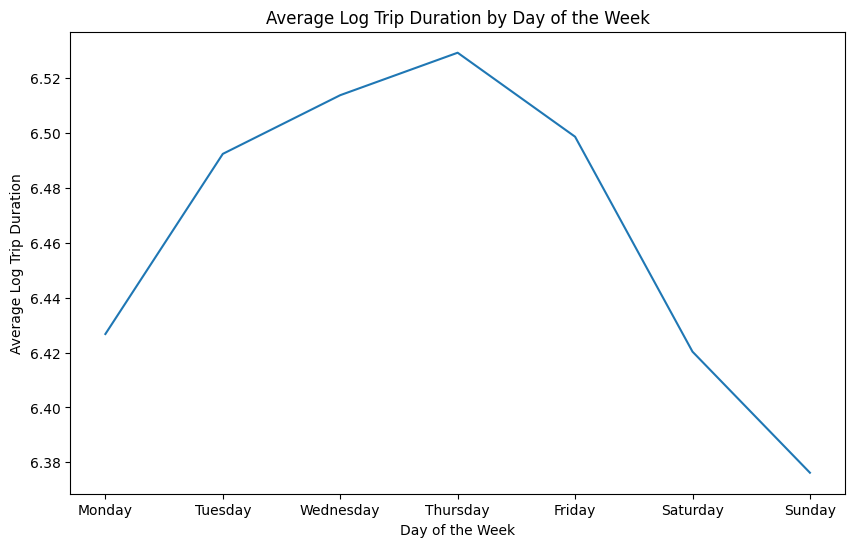

In [105]:
avg_log_duration_weekday = train_df.groupby('day_of_week')['log_trip_duration'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_log_duration_weekday)
plt.xticks(ticks=range(7), labels= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Day of the Week")
plt.ylabel("Average Log Trip Duration")
plt.title("Average Log Trip Duration by Day of the Week")
plt.show()




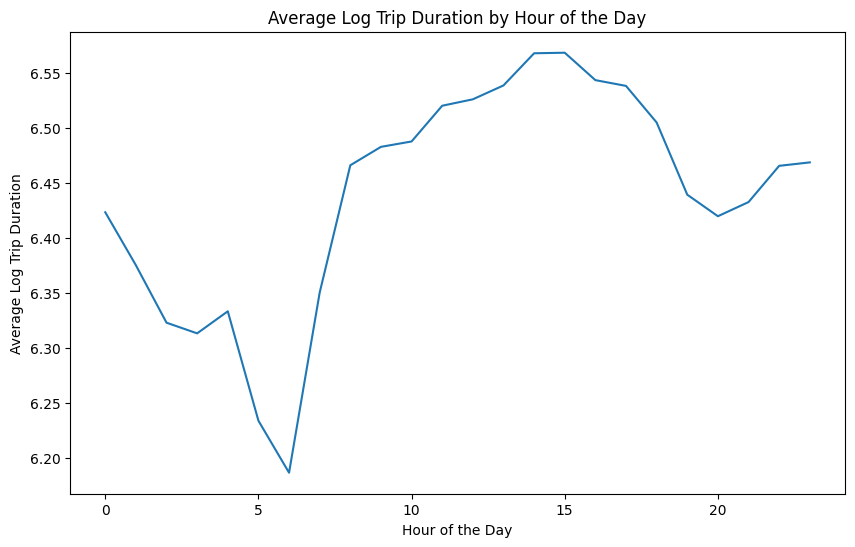

In [106]:

avg_log_duration_hour = train_df.groupby('pickup_hour')['log_trip_duration'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_log_duration_hour)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Log Trip Duration")
plt.title("Average Log Trip Duration by Hour of the Day")
plt.show()

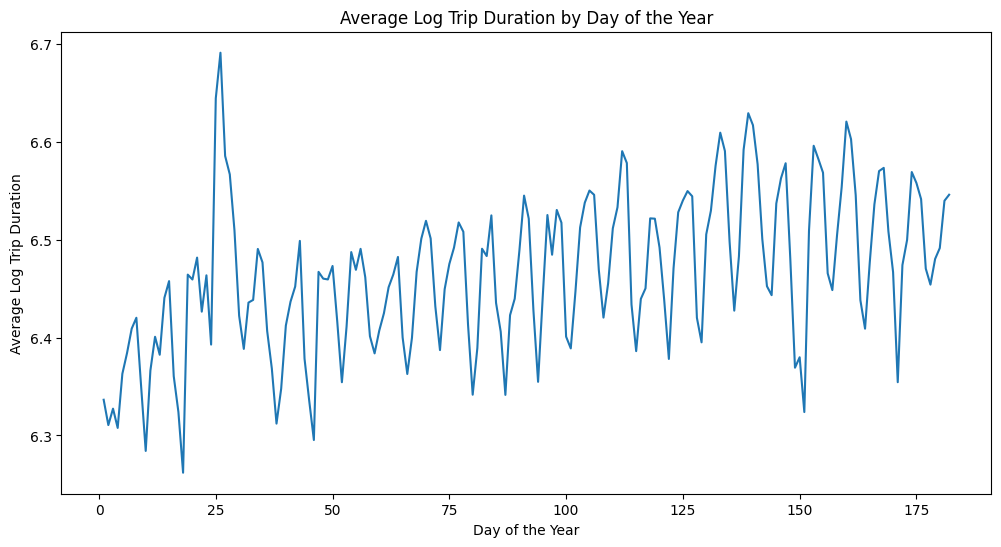

In [107]:
avg_log_duration_day_of_year = train_df.groupby(train_df['day_of_year'])['log_trip_duration'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_log_duration_day_of_year)
plt.xlabel("Day of the Year")
plt.ylabel("Average Log Trip Duration")
plt.title("Average Log Trip Duration by Day of the Year")
plt.show()

- Графики зависимости таргета от дня недели и от часа в сутках похожи на графики для количества поездок. Это связано с тем, что количество поездок и их продолжительность часто зависят от одних и тех же факторов, таких как время суток и день недели. Например, в часы пик количество поездок увеличивается, что может также влиять на продолжительность поездок из-за пробок.
- В аномальные периоды, такие как снежная буря или сбой в аэропорту, средний таргет может изменяться. Например, во время снежной бури количество поездок резко снижается, но те, что остаются, могут быть более длительными из-за плохих дорожных условий.
- На графике зависимости `log_trip_duration` от номера дня в году можно наблюдать сезонные тренды, такие как увеличение продолжительности поездок в праздничные периоды или снижение в летние месяцы, когда меньше людей пользуются такси.

In [108]:
anomalous_dates = ['2016-01-23', '2016-05-30']
anomalous_dates = [pd.to_datetime(date).date() for date in anomalous_dates]

df['anomalous_period_1'] = df['pickup_date'].apply(lambda x: 1 if x == anomalous_dates[0] else 0)
df['anomalous_period_2'] = df['pickup_date'].apply(lambda x: 1 if x == anomalous_dates[1] else 0)
df.head()


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,day_of_week,pickup_hour,pickup_month,day_of_year,anomalous_period_1,anomalous_period_2
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,0,17,3,74,0,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,6,0,6,164,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,1,11,1,19,0,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,2,19,4,97,0,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,5,13,3,86,0,0



Категориальные признаки:
- day_of_week (день недели) - это циклический признак, где нет естественного порядка между днями
- pickup_month (месяц) - циклический признак
- anomalous_period_1 и anomalous_period_2 - бинарные признаки, которые по своей природе категориальные

Численные признаки:
- day_of_year (номер дня в году) - имеет естественный порядок и отражает сезонность
- pickup_hour (час) - имеет естественный порядок
Циклические признаки (день недели, час, месяц) лучше рассматривать как категориальные, 
потому что между последним и первым значением нет линейной зависимости (например, между 23:00 и 00:00).
Номер дня в году можно рассматривать как численный, так как он отражает непрерывное течение времени в году.

`Ridge`-регрессия с параметрами по умолчанию

In [109]:
numeric_data = df.select_dtypes([np.number])
numeric_data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,day_of_week,pickup_hour,pickup_month,day_of_year,anomalous_period_1,anomalous_period_2
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,6.122493,0,17,3,74,0,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6.498282,6,0,6,164,0,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,7.661527,1,11,1,19,0,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,6.063785,2,19,4,97,0,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,6.077642,5,13,3,86,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,778,6.658011,4,13,4,99,0,0
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,655,6.486161,6,7,1,10,0,0
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,764,6.639876,4,6,4,113,0,0
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,373,5.924256,1,15,1,5,0,0


In [110]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
from sklearn.impute import SimpleImputer

X = df[['day_of_week', 'pickup_hour', 'pickup_month', 'day_of_year',
        'anomalous_period_1', 'anomalous_period_2']]
y = df['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
numeric_features = ['pickup_hour', 'day_of_year']
categorical_features = ['day_of_week', 'pickup_month', 'anomalous_period_1', 
                      'anomalous_period_2']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Ridge())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")


Root Mean Squared Logarithmic Error (RMSLE): 0.11262948341548769


In [111]:
from typing import Iterable

import folium

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [112]:
sample_df = df.sample(1000, random_state=42)

your_lat_values = sample_df['pickup_latitude']
your_lon_values = sample_df['pickup_longitude']


show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

Аэропорты (на юго-востоке и на юго-западе от Манхэттена) расположены далеко от центральной части города.
Они важны для анализа, так как поездки от/до аэропортов могут быть длиннее и отличаются от среднестатистических поездок по городу
Центральный Манхэттен (густое скопление в центре карты)является деловым центром города, где сосредоточено много офисов, гостиниц, и туристических объектов.
Эти поездки могут характеризоваться короткими расстояниями и быстрыми поездками
Жилые районы, удаленные от центра (север и восток от Манхэттена). Эти поездки могут иметь характерные утренние и вечерние пики, соответствующие поездкам на работу и домой.

Кратчайшее расстояние для объектов

In [113]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

df['haversine'] = haversine_array(df['pickup_latitude'], df['pickup_longitude'],
                                  df['dropoff_latitude'], df['dropoff_longitude'])

df.head()
# df.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(df['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,day_of_week,pickup_hour,pickup_month,day_of_year,anomalous_period_1,anomalous_period_2,haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,0,17,3,74,0,0,1.498521
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,6,0,6,164,0,0,1.805507
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,1,11,1,19,0,0,6.385098
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,2,19,4,97,0,0,1.485498
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,5,13,3,86,0,0,1.188588


In [114]:
df['log_haversine'] = np.log(df['haversine']+1)
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,day_of_week,pickup_hour,pickup_month,day_of_year,anomalous_period_1,anomalous_period_2,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,0,17,3,74,0,0,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,6,0,6,164,0,0,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,1,11,1,19,0,0,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,2,19,4,97,0,0,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,5,13,3,86,0,0,1.188588,0.783257


Логарифм расстояния лучше отражает таргет, чем просто расстояние

In [115]:

correlation_haversine = df['log_trip_duration'].corr(df['haversine'])
correlation_log_haversine = df['log_trip_duration'].corr(df['log_haversine'])

correlation_haversine, correlation_log_haversine

(0.5735948311180167, 0.7498822373942503)

Распределение средней скорости для каждого объекта обучающей выборки

In [116]:
df['average_speed'] = df['haversine'] / df['trip_duration']  * 3600


df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_date,day_of_week,pickup_hour,pickup_month,day_of_year,anomalous_period_1,anomalous_period_2,haversine,log_haversine,average_speed
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,2016-03-14,0,17,3,74,0,0,1.498521,0.915699,11.856428
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,2016-06-12,6,0,6,164,0,0,1.805507,1.031584,9.803659
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,2016-01-19,1,11,1,19,0,0,6.385098,1.999464,10.822201
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,2016-04-06,2,19,4,97,0,0,1.485498,0.910473,12.465721
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,2016-03-26,5,13,3,86,0,0,1.188588,0.783257,9.836594


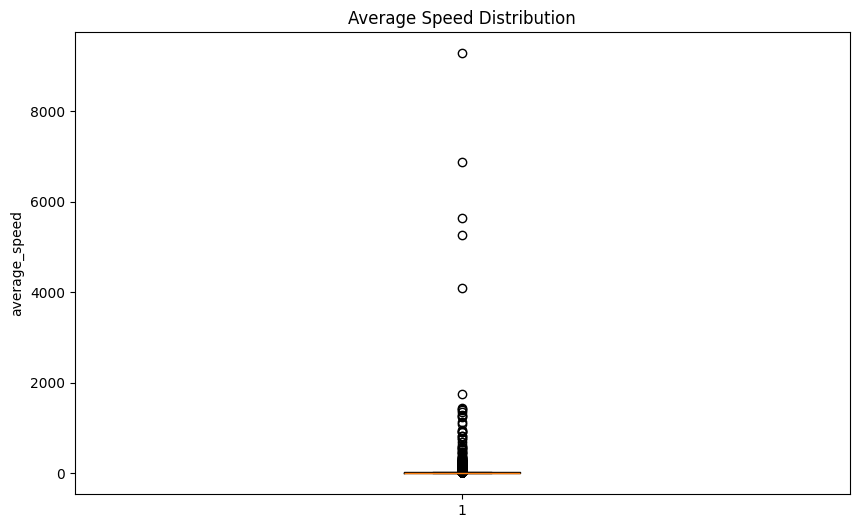

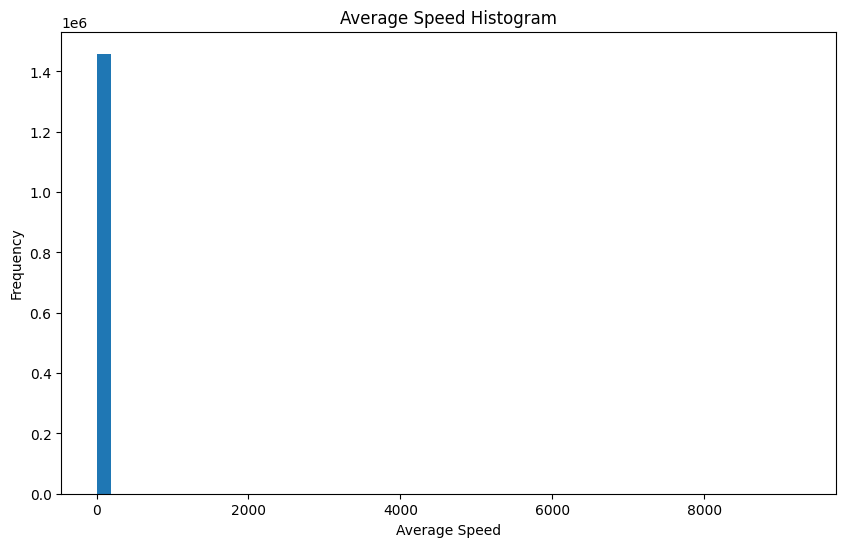

In [117]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['average_speed'])
plt.ylabel('average_speed')
plt.title('Average Speed Distribution')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['average_speed'], bins=50)
plt.xlabel('Average Speed')
plt.ylabel('Frequency')
plt.title('Average Speed Histogram')
plt.show()

In [118]:
df.describe()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,day_of_week,pickup_hour,pickup_month,day_of_year,anomalous_period_1,anomalous_period_2,haversine,log_haversine,average_speed
count,1.458644e+06,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037120,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,6.466978e+00,3.050375e+00,1.360648e+01,3.516818e+00,9.183607e+01,1.129816e-03,3.818615e-03,3.440864e+00,1.254586e+00,1.442321e+01
min,1.000000e+00,2016-01-01 00:00:17,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,6.931472e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,5.986452e+00,1.000000e+00,9.000000e+00,2.000000e+00,4.800000e+01,0.000000e+00,0.000000e+00,1.231837e+00,8.028248e-01,9.121275e+00
50%,2.000000e+00,2016-04-01 17:19:40,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,6.496775e+00,3.000000e+00,1.400000e+01,4.000000e+00,9.200000e+01,0.000000e+00,0.000000e+00,2.093717e+00,1.129373e+00,1.279198e+01
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,6.981006e+00,5.000000e+00,1.900000e+01,5.000000e+00,1.360000e+02,0.000000e+00,0.000000e+00,3.875337e+00,1.584189e+00,1.784491e+01
max,2.000000e+00,2016-06-30 23:59:39,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.507575e+01,6.000000e+00,2.300000e+01,6.000000e+00,1.820000e+02,1.000000e+00,1.000000e+00,1.240909e+03,7.124405e+00,9.274837e+03
std,4.987772e-01,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,7.957595e-01,1.954039e+00,6.399693e+00,1.681038e+00,5.156608e+01,3.359376e-02,6.167687e-02,4.296538e+00,6.271529e-01,1.497752e+01


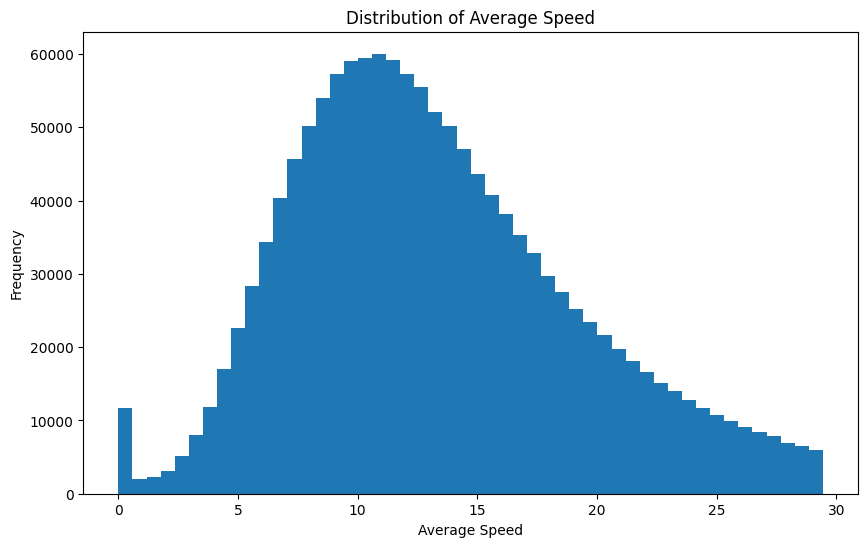

In [119]:

reasonable_speeds = df[df['average_speed'] <= df['average_speed'].quantile(0.95)]


plt.figure(figsize=(10, 6))
plt.hist(reasonable_speeds['average_speed'], bins=50)
plt.xlabel('Average Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Average Speed')
plt.show()

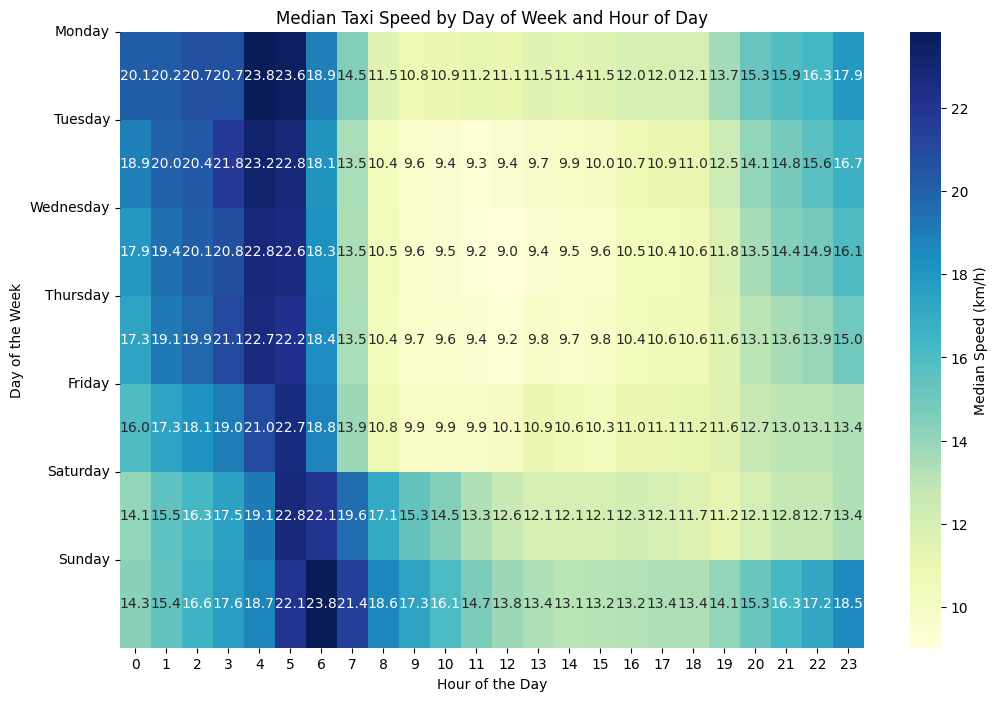

In [120]:
import seaborn as sns

median_speed = df.pivot_table(values='average_speed', index='day_of_week', columns='pickup_hour', aggfunc='median')

plt.figure(figsize=(12, 8))
sns.heatmap(median_speed, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Median Speed (km/h)'})
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Median Taxi Speed by Day of Week and Hour of Day")
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.show()

In [121]:
df = df.drop(columns=["average_speed"])
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,day_of_week,pickup_hour,pickup_month,day_of_year,anomalous_period_1,anomalous_period_2,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,0,17,3,74,0,0,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,6,0,6,164,0,0,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,1,11,1,19,0,0,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,2,19,4,97,0,0,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,5,13,3,86,0,0,1.188588,0.783257


Значение скорости нельзя использовать во время обучения модели, так как оно напрямую зависит от целевой переменной trip_duration.

Минимальная скорость наблюдается в будние дни с 7 до 18 (с пн по чт) и до 23 (по пт и сб)
Максимальная скорость достигается поздней ночью и ранним утром.

In [122]:
df['rush_hour'] = df.apply(lambda row: 1 if ((row['day_of_week'] < 5) and
                           (7 <= row['pickup_hour'] <= 18)) or (( 3 < row['day_of_week'] < 6) and
                           (11 <= row['pickup_hour'] <= 22)) else 0, axis=1)

df['free_roads'] = df['pickup_hour'].apply(lambda hour: 1 if 0 <= hour <= 5 else 0)


df.head()


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,day_of_week,pickup_hour,pickup_month,day_of_year,anomalous_period_1,anomalous_period_2,haversine,log_haversine,rush_hour,free_roads
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,0,17,3,74,0,0,1.498521,0.915699,1,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,6,0,6,164,0,0,1.805507,1.031584,0,1
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,1,11,1,19,0,0,6.385098,1.999464,1,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,2,19,4,97,0,0,1.485498,0.910473,0,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,5,13,3,86,0,0,1.188588,0.783257,1,0


Добавила признаки, началась или кончилась поездка в аэропору Джона Кеннеди, аэропорту Ла Гуардина и на площадиТаймс-сквер

In [123]:
jfk_lat, jfk_lon = 40.6413, -73.7781
lga_lat, lga_lon = 40.7769, -73.8740
times_square_lat, times_square_lon = 40.7580, -73.9855


In [124]:

df['pickup_jfk'] = df.apply(lambda row: 1 if (abs(row['pickup_latitude'] - jfk_lat) < 0.01 and 
                                             abs(row['pickup_longitude'] - jfk_lon) < 0.01) else 0, axis=1)
df['pickup_lga'] = df.apply(lambda row: 1 if (abs(row['pickup_latitude'] - lga_lat) < 0.01 and
                                             abs(row['pickup_longitude'] - lga_lon) < 0.01) else 0, axis=1)
df['pickup_times_square'] = df.apply(lambda row: 1 if (abs(row['pickup_latitude'] - times_square_lat) < 0.01 and
                                                      abs(row['pickup_longitude'] - times_square_lon) < 0.01) else 0, axis=1)


In [125]:

df['dropoff_jfk'] = df.apply(lambda row: 1 if (abs(row['dropoff_latitude'] - jfk_lat) < 0.01 and
                                              abs(row['dropoff_longitude'] - jfk_lon) < 0.01) else 0, axis=1)
df['dropoff_lga'] = df.apply(lambda row: 1 if (abs(row['dropoff_latitude'] - lga_lat) < 0.01 and
                                              abs(row['dropoff_longitude'] - lga_lon) < 0.01) else 0, axis=1)
df['dropoff_times_square'] = df.apply(lambda row: 1 if (abs(row['dropoff_latitude'] - times_square_lat) < 0.01 and
                                                       abs(row['dropoff_longitude'] - times_square_lon) < 0.01) else 0, axis=1)

Распределения логарифма времени поездки

C:\Users\vika4\AppData\Local\Temp\ipykernel_4492\1324934565.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,0].boxplot([df[df['pickup_jfk']==1]['log_trip_duration'],
C:\Users\vika4\AppData\Local\Temp\ipykernel_4492\1324934565.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot([df[df['dropoff_jfk']==1]['log_trip_duration'],
C:\Users\vika4\AppData\Local\Temp\ipykernel_4492\1324934565.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot([df[df['pickup_lga']==1]['log_trip_duration'],
C:\Users\vika4\AppData\Local\Temp\ipykernel_4492\1324934565.py:21: MatplotlibDeprecationWar

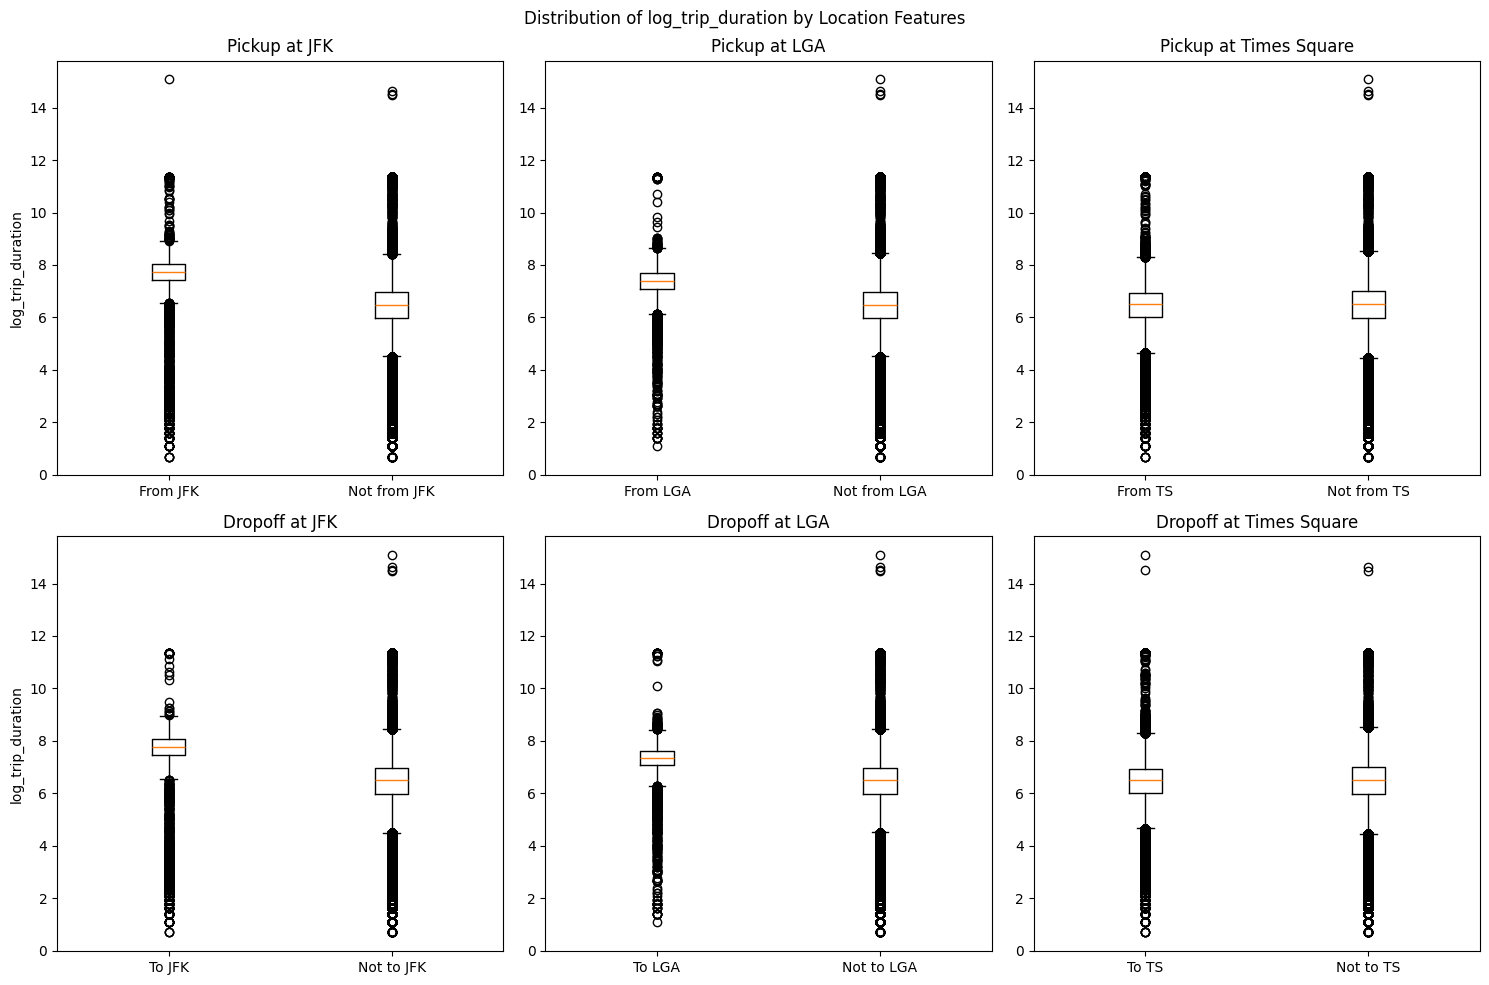

In [126]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of log_trip_duration by Location Features')

axes[0,0].boxplot([df[df['pickup_jfk']==1]['log_trip_duration'], 
                  df[df['pickup_jfk']==0]['log_trip_duration']], 
                  labels=['From JFK', 'Not from JFK'])
axes[0,0].set_title('Pickup at JFK')
axes[0,0].set_ylabel('log_trip_duration')

axes[1,0].boxplot([df[df['dropoff_jfk']==1]['log_trip_duration'],
                  df[df['dropoff_jfk']==0]['log_trip_duration']], 
                  labels=['To JFK', 'Not to JFK'])
axes[1,0].set_title('Dropoff at JFK')
axes[1,0].set_ylabel('log_trip_duration')

axes[0,1].boxplot([df[df['pickup_lga']==1]['log_trip_duration'],
                  df[df['pickup_lga']==0]['log_trip_duration']], 
                  labels=['From LGA', 'Not from LGA'])
axes[0,1].set_title('Pickup at LGA')

axes[1,1].boxplot([df[df['dropoff_lga']==1]['log_trip_duration'],
                  df[df['dropoff_lga']==0]['log_trip_duration']], 
                  labels=['To LGA', 'Not to LGA'])
axes[1,1].set_title('Dropoff at LGA')

axes[0,2].boxplot([df[df['pickup_times_square']==1]['log_trip_duration'],
                  df[df['pickup_times_square']==0]['log_trip_duration']], 
                  labels=['From TS', 'Not from TS'])
axes[0,2].set_title('Pickup at Times Square')

axes[1,2].boxplot([df[df['dropoff_times_square']==1]['log_trip_duration'],
                  df[df['dropoff_times_square']==0]['log_trip_duration']], 
                  labels=['To TS', 'Not to TS'])
axes[1,2].set_title('Dropoff at Times Square')

plt.tight_layout()
plt.show()


1) Видно, что поездки, начинающиеся или заканчивающиеся в аэропортах, имеют более высокую медиану логарифма времени поездки. 
2) Но поездки, начинающиеся или заканчивающиеся в Таймс-сквер, не показывают значительных отличий в медиане логарифма времени поездки по сравнению с другими поездками. 

В целом, признаки, связанные с аэропортами, кажутся более информативными, чем признаки, связанные с Таймс-сквер. 

Трансформер, который разбивает область на ячейки и создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка


In [127]:
sample_df = df.head(5)
your_lat_values = sample_df['pickup_latitude']
your_lon_values = sample_df['pickup_longitude']


show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

In [128]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=10, n_cols=10):
        self.n_rows = n_rows
        self.n_cols = n_cols
        #NYC area
        self.lat_min = 40.6
        self.lat_max = 40.9
        self.lon_min = -74.05
        self.lon_max = -73.7
        
    def show_map(self):
        m = folium.Map(location=[40.75, -73.875], zoom_start=11)
        
        lat_step = (self.lat_max - self.lat_min) / self.n_rows
        lon_step = (self.lon_max - self.lon_min) / self.n_cols
        
        for i in range(self.n_rows + 1):
            lat = self.lat_min + i * lat_step
            folium.PolyLine(locations=[[lat, self.lon_min], [lat, self.lon_max]], 
                           color="red", weight=1).add_to(m)
            
        for j in range(self.n_cols + 1):
            lon = self.lon_min + j * lon_step
            folium.PolyLine(locations=[[self.lat_min, lon], [self.lat_max, lon]], 
                           color="red", weight=1).add_to(m)
            
        return m

    def fit(self, X=None, y=None):
        return self

    def transform(self, X, y=None):
        import pandas as pd
        import numpy as np
        
        X_new = X.copy()
        
        lat_step = (self.lat_max - self.lat_min) / self.n_rows
        lon_step = (self.lon_max - self.lon_min) / self.n_cols
        
        pickup_row = ((X_new['pickup_latitude'] - self.lat_min) / lat_step).astype(int)
        pickup_col = ((X_new['pickup_longitude'] - self.lon_min) / lon_step).astype(int)
        
        dropoff_row = ((X_new['dropoff_latitude'] - self.lat_min) / lat_step).astype(int)
        dropoff_col = ((X_new['dropoff_longitude'] - self.lon_min) / lon_step).astype(int)
        
        pickup_cell = np.where(
            (pickup_row >= 0) & (pickup_row < self.n_rows) & 
            (pickup_col >= 0) & (pickup_col < self.n_cols),
            pickup_row * self.n_cols + pickup_col,
            -1
        )
        
        dropoff_cell = np.where(
            (dropoff_row >= 0) & (dropoff_row < self.n_rows) & 
            (dropoff_col >= 0) & (dropoff_col < self.n_cols),
            dropoff_row * self.n_cols + dropoff_col,
            -1
        )
        
        return pd.DataFrame({
            'pickup_cell': pickup_cell,
            'dropoff_cell': dropoff_cell
        })

In [129]:
grid_transformer = MapGridTransformer(n_rows=10, n_cols=10)
grid_transformer.show_map()

In [130]:
grid_features = grid_transformer.transform(df)
df = pd.concat([df, grid_features], axis=1)

In [131]:
df.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'pickup_date', 'day_of_week', 'pickup_hour',
       'pickup_month', 'day_of_year', 'anomalous_period_1',
       'anomalous_period_2', 'haversine', 'log_haversine', 'rush_hour',
       'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
       'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_cell',
       'dropoff_cell'],
      dtype='object')

`Ridge`-регрессия со стандартными параметрами на новых признаках

In [132]:
df = df.loc[:,~df.columns.duplicated()]

X = df[['haversine', 'pickup_hour', 'pickup_month', 
        'day_of_week', 'day_of_year', 'anomalous_period_1', 'anomalous_period_2',
        'rush_hour', 'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
        'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_cell', 'dropoff_cell']]
y = df['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['haversine', 'pickup_hour', 
                   'day_of_year', 'pickup_cell', 'dropoff_cell']
categorical_features = ['anomalous_period_1', 'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square', 'pickup_month', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

RMSLE: 0.0889


Стало лучше!

In [133]:
df_old = df.copy()

In [134]:
print("Number of unique values in vendor_id:", df['vendor_id'].nunique())
print("Number of unique values in passenger_count:", df['passenger_count'].nunique())
print("Number of unique values in store_and_fwd_flag:", df['store_and_fwd_flag'].nunique())


Number of unique values in vendor_id: 2
Number of unique values in passenger_count: 10
Number of unique values in store_and_fwd_flag: 2


In [135]:

print("\nUnique values in vendor_id:", df['vendor_id'].unique())
print("Unique values in passenger_count:", df['passenger_count'].unique())
print("Unique values in store_and_fwd_flag:", df['store_and_fwd_flag'].unique())


Unique values in vendor_id: [2 1]
Unique values in passenger_count: [1 6 4 2 3 5 0 7 9 8]
Unique values in store_and_fwd_flag: ['N' 'Y']


C:\Users\vika4\AppData\Local\Temp\ipykernel_4492\1545112362.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df[df['vendor_id']==id]['log_trip_duration'] for id in df['vendor_id'].unique()],
C:\Users\vika4\AppData\Local\Temp\ipykernel_4492\1545112362.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df[df['passenger_count']==count]['log_trip_duration'] for count in sorted(df['passenger_count'].unique())],
C:\Users\vika4\AppData\Local\Temp\ipykernel_4492\1545112362.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([df[df['store_and_fwd_flag']==flag]['log_trip_du

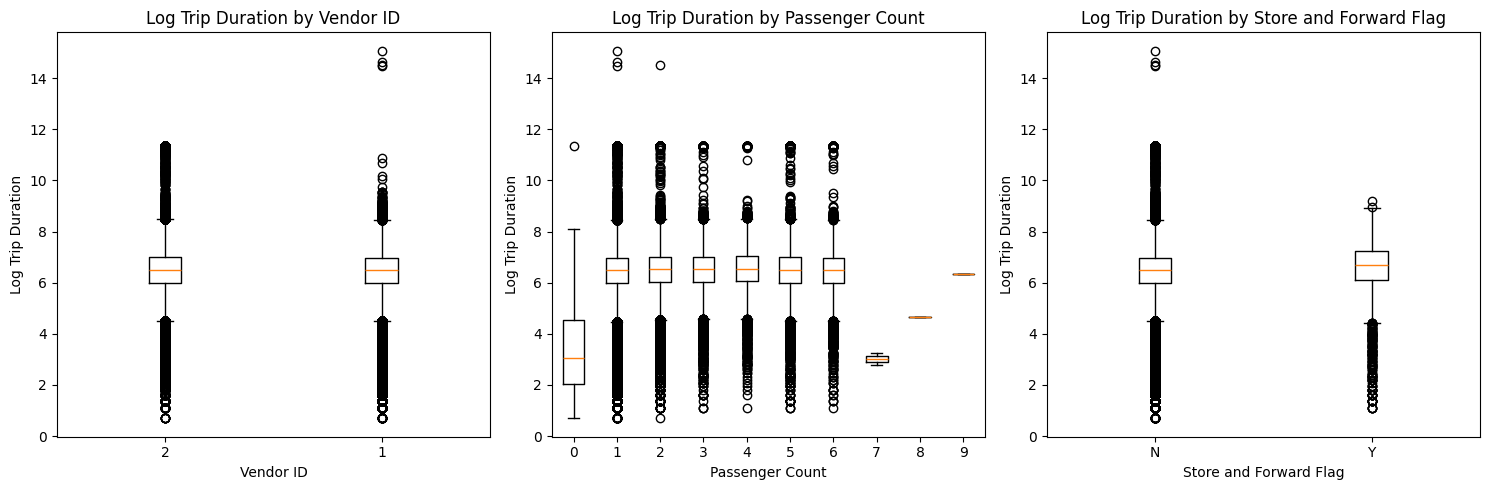

In [136]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot([df[df['vendor_id']==id]['log_trip_duration'] for id in df['vendor_id'].unique()],
                labels=df['vendor_id'].unique())
axes[0].set_title('Log Trip Duration by Vendor ID')
axes[0].set_xlabel('Vendor ID')
axes[0].set_ylabel('Log Trip Duration')

axes[1].boxplot([df[df['passenger_count']==count]['log_trip_duration'] for count in sorted(df['passenger_count'].unique())],
                labels=sorted(df['passenger_count'].unique()))
axes[1].set_title('Log Trip Duration by Passenger Count')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Log Trip Duration')

axes[2].boxplot([df[df['store_and_fwd_flag']==flag]['log_trip_duration'] for flag in df['store_and_fwd_flag'].unique()],
                labels=df['store_and_fwd_flag'].unique())
axes[2].set_title('Log Trip Duration by Store and Forward Flag')
axes[2].set_xlabel('Store and Forward Flag')
axes[2].set_ylabel('Log Trip Duration')

plt.tight_layout()
plt.show()

In [137]:
df['vendor_id'] = df['vendor_id'].map({1: 0, 2: 1})
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

1) Vendor ID: Различия в распределении логарифма времени поездки между разными значениями vendor_id незначительны. Поэтому признак vendor_id не сильный.
2) Passenger Count: Видно, что распределение логарифма времени поездки меняется в зависимости от количества пассажиров, особенно для значений 0 и 1. Это может быть полезным признаком, так как количество пассажиров может влиять на продолжительность поездки.
3) Store and Forward Flag: Различия в распределении логарифма времени поездки между значениями store_and_fwd_flag незначительны. Поэтому признак store_and_fwd_flag не сильный.

 `Ridge`-регрессия со стандартными параметрами на новых признаках

In [138]:

X = df[['haversine', 'pickup_hour', 'pickup_month', 'day_of_week', 
        'day_of_year', 'anomalous_period_1', 'anomalous_period_2',
        'rush_hour', 'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
        'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_cell', 'dropoff_cell']]
y = df['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['haversine', 'pickup_hour',  
                   'day_of_year', 'pickup_cell', 'dropoff_cell']
categorical_features = ['anomalous_period_1', 'anomalous_period_2', 'rush_hour', 
                       'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
                       'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_month', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)
rmsle_without = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
print(f"RMSLE without vendor_id, passenger_count, store_and_fwd_flag: {rmsle_without:.4f}")

#with these 3 features added
X = df[['vendor_id', 'passenger_count', 'store_and_fwd_flag',
        'haversine', 'pickup_hour', 'pickup_month', 'day_of_week', 
        'day_of_year', 'anomalous_period_1', 'anomalous_period_2',
        'rush_hour', 'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
        'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_cell', 'dropoff_cell']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['haversine', 'pickup_hour', 'pickup_month', 'day_of_week', 
                   'day_of_year', 'pickup_cell', 'dropoff_cell']
categorical_features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag',
                       'anomalous_period_1', 'anomalous_period_2', 'rush_hour', 
                       'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
                       'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)
rmsle_with = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
print(f"RMSLE with vendor_id, passenger_count, store_and_fwd_flag: {rmsle_with:.4f}")

print(f"\nRMSLE difference: {abs(rmsle_with - rmsle_without):.4f}")

RMSLE without vendor_id, passenger_count, store_and_fwd_flag: 0.0889
RMSLE with vendor_id, passenger_count, store_and_fwd_flag: 0.0889

RMSLE difference: 0.0001


Исключаем выбросы

In [139]:
df = df_old.copy()

In [140]:
df = df.loc[:,~df.columns.duplicated()]

numeric_cols = ['haversine', 'pickup_hour', 
               'day_of_year', 'pickup_cell', 'dropoff_cell']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

passenger_count_categories = df['passenger_count'].unique()

X = df[['vendor_id', 'passenger_count', 'haversine', 'pickup_hour', 'pickup_month', 
        'day_of_week', 'day_of_year', 'anomalous_period_1', 'anomalous_period_2',
        'rush_hour', 'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
        'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_cell', 'dropoff_cell']]
y = df['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['haversine', 'pickup_hour',
                   'day_of_year', 'pickup_cell', 'dropoff_cell']
categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square',  'pickup_month', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

c:\Users\vika4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RMSLE: 0.0770


Объединяем редкие категории

In [141]:
df = df.loc[:,~df.columns.duplicated()]

rare_threshold = len(df) * 0.01

categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square',  'pickup_month', 'day_of_week']

for col in categorical_features:
    value_counts = df[col].value_counts()
    rare_categories = value_counts[value_counts < rare_threshold].index
    if len(rare_categories) > 0:
        df[col] = df[col].replace(rare_categories, 'Other')

    df[col] = df[col].astype(str)

numeric_cols = ['haversine', 'pickup_hour',
               'day_of_year', 'pickup_cell', 'dropoff_cell']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

passenger_count_categories = df['passenger_count'].unique()

X = df[['vendor_id', 'passenger_count', 'haversine', 'pickup_hour', 'pickup_month', 
        'day_of_week', 'day_of_year', 'anomalous_period_1', 'anomalous_period_2',
        'rush_hour', 'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
        'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_cell', 'dropoff_cell']]
y = df['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['haversine', 'pickup_hour', 
                   'day_of_year', 'pickup_cell', 'dropoff_cell']
categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square',  'pickup_month', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

RMSLE: 0.0767


In [142]:
categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square',  'pickup_month', 'day_of_week']


X = df[categorical_features]
print("Number of features before encoding:", X.shape[1])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])
pipeline.fit(X)

print(f"Number of features after encoding: {len(pipeline.named_steps['preprocessor'].get_feature_names_out())}")

Number of features before encoding: 14
Number of features after encoding: 26


`Ridge`-, а `Lasso`-регрессии на очищенных признаках

In [143]:
from sklearn.linear_model import Lasso

df = df.loc[:,~df.columns.duplicated()]

rare_threshold = len(df) * 0.01
categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square',  'pickup_month', 'day_of_week']

for col in categorical_features:
    value_counts = df[col].value_counts()
    rare_categories = value_counts[value_counts < rare_threshold].index
    if len(rare_categories) > 0:
        df[col] = df[col].replace(rare_categories, 'Other')
        
    df[col] = df[col].astype(str)

numeric_cols = ['haversine', 'pickup_hour',
               'day_of_year', 'pickup_cell', 'dropoff_cell']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

passenger_count_categories = df['passenger_count'].unique()

X = df[['vendor_id', 'passenger_count', 'haversine', 'pickup_hour', 'pickup_month', 
        'day_of_week', 'day_of_year', 'anomalous_period_1', 'anomalous_period_2',
        'rush_hour', 'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
        'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_cell', 'dropoff_cell']]
y = df['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['haversine', 'pickup_hour',
                   'day_of_year', 'pickup_cell', 'dropoff_cell']
categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square',  'pickup_month', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
ridge_pipeline.fit(X_train, y_train)

y_pred_ridge = ridge_pipeline.predict(X_test)
rmsle_ridge = np.sqrt(mean_squared_log_error(y_test, y_pred_ridge))
print(f"Ridge RMSLE: {rmsle_ridge:.4f}")

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])
lasso_pipeline.fit(X_train, y_train)

y_pred_lasso = lasso_pipeline.predict(X_test)
rmsle_lasso = np.sqrt(mean_squared_log_error(y_test, y_pred_lasso))
print(f"Lasso RMSLE: {rmsle_lasso:.4f}")

print(f"\nDifference (Ridge - Lasso): {rmsle_ridge - rmsle_lasso:.4f}")

Ridge RMSLE: 0.0764
Lasso RMSLE: 0.1031

Difference (Ridge - Lasso): -0.0268


In [144]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

numeric_features = ['haversine', 'pickup_hour',
                   'day_of_year', 'pickup_cell', 'dropoff_cell']
categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square',  'pickup_month', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

alphas = np.logspace(-3, 3, 20)
ridge_scores = []
for alpha in alphas:
    ridge_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=alpha))
    ])
    ridge_pipeline.fit(X_train, y_train)
    y_pred_val = ridge_pipeline.predict(X_val)
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred_val))
    ridge_scores.append(rmsle)

best_ridge_alpha = alphas[np.argmin(ridge_scores)]
print(f"Best Ridge alpha: {best_ridge_alpha:.4f}")

lasso_scores = []
for alpha in alphas:
    lasso_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=alpha))
    ])
    lasso_pipeline.fit(X_train, y_train)
    y_pred_val = lasso_pipeline.predict(X_val)
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred_val))
    lasso_scores.append(rmsle)

best_lasso_alpha = alphas[np.argmin(lasso_scores)]
print(f"Best Lasso alpha: {best_lasso_alpha:.4f}")

final_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=best_ridge_alpha))
])
final_ridge.fit(X_train_full, y_train_full)
y_pred_ridge = final_ridge.predict(X_test)
rmsle_ridge = np.sqrt(mean_squared_log_error(y_test, y_pred_ridge))

final_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=best_lasso_alpha))
])
final_lasso.fit(X_train_full, y_train_full)
y_pred_lasso = final_lasso.predict(X_test)
rmsle_lasso = np.sqrt(mean_squared_log_error(y_test, y_pred_lasso))

print(f"\nTest RMSLE scores:")
print(f"Ridge: {rmsle_ridge:.4f}")
print(f"Lasso: {rmsle_lasso:.4f}")
print(f"Difference (Ridge - Lasso): {rmsle_ridge - rmsle_lasso:.4f}")

Best Ridge alpha: 12.7427
Best Lasso alpha: 0.0010

Test RMSLE scores:
Ridge: 0.0764
Lasso: 0.0765
Difference (Ridge - Lasso): -0.0001


Бенчмарк

In [ ]:

best_rmsle = 0.0764

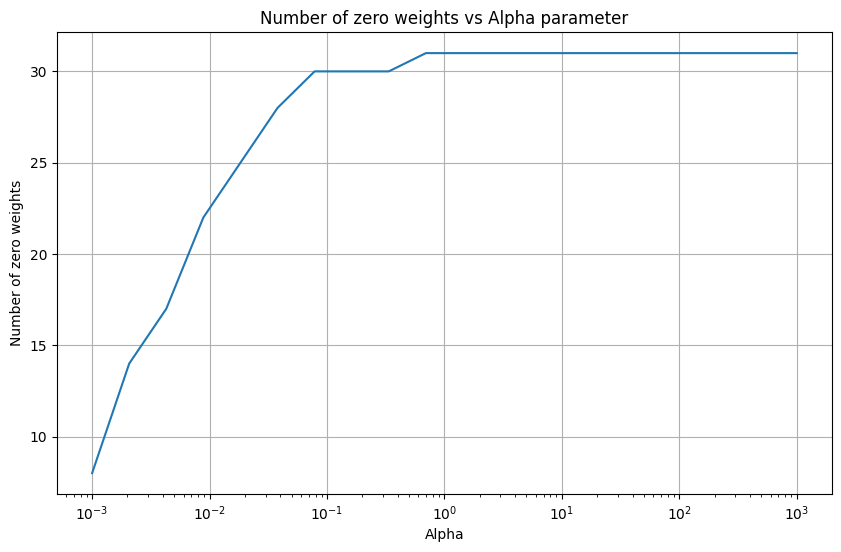


Results for model with ~50% features eliminated:
Alpha: 0.001000
Number of zero weights: 8
RMSLE: 0.0765
RMSLE difference from best: 0.0001


In [148]:
n_features = X_train_full.shape[1]
zero_weights = []
for alpha in alphas:
    lasso = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=alpha))
    ])
    lasso.fit(X_train_full, y_train_full)
    coef = lasso.named_steps['regressor'].coef_
    n_zeros = np.sum(coef == 0)
    zero_weights.append(n_zeros)

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, zero_weights)
plt.xlabel('Alpha')
plt.ylabel('Number of zero weights')
plt.title('Number of zero weights vs Alpha parameter')
plt.grid(True)
plt.show()

target_zeros = n_features // 2
closest_idx = np.argmin(np.abs(np.array(zero_weights) - target_zeros))
alpha_half_features = alphas[closest_idx]

lasso_half = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=alpha_half_features))
])
lasso_half.fit(X_train_full, y_train_full)
y_pred_half = lasso_half.predict(X_test)
rmsle_half = np.sqrt(mean_squared_log_error(y_test, y_pred_half))

print(f"\nResults for model with ~50% features eliminated:")
print(f"Alpha: {alpha_half_features:.6f}")
print(f"Number of zero weights: {zero_weights[closest_idx]}")
print(f"RMSLE: {rmsle_half:.4f}")
print(f"RMSLE difference from best: {rmsle_half - min(rmsle_ridge, rmsle_lasso):.4f}")

Кодируем откуда и куда должно было ехать такси.


In [149]:
cell_pairs = df[['pickup_cell', 'dropoff_cell']].value_counts().reset_index()
cell_pairs.columns = ['pickup_cell', 'dropoff_cell', 'count']

top_100_pairs = cell_pairs.head(100)
pair_to_idx = {(row['pickup_cell'], row['dropoff_cell']): i 
               for i, (_, row) in enumerate(top_100_pairs.iterrows())}

def encode_cell_pair(row):
    pair = (row['pickup_cell'], row['dropoff_cell'])
    return pair_to_idx.get(pair, -1)

df['common_route'] = df.apply(encode_cell_pair, axis=1)


Такой признак может быть полезным, потому что:
1) он может помочь линейной модели "вытащить" информацию о том, откуда и куда чаще всего ездят такси. 
2) подчеркивает, что поездки часто происходят по одним и тем же маршрутам, что может быть полезно для предсказания будущих поездок.
3) засчет того, что берем 100 самых частых пар, мы не сильно забиваем модель новыми редкими значениями, которые могут быть шумовыми.

Заново обучаем модель

In [150]:
from sklearn.linear_model import Lasso, Ridge

df = df.loc[:,~df.columns.duplicated()]

rare_threshold = len(df) * 0.01

categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square', 'common_route',  'pickup_month', 'day_of_week']

for col in categorical_features:
    value_counts = df[col].value_counts()
    rare_categories = value_counts[value_counts < rare_threshold].index
    if len(rare_categories) > 0:
        df[col] = df[col].replace(rare_categories, 'Other')
        
    df[col] = df[col].astype(str)

numeric_cols = ['haversine', 'pickup_hour',
               'day_of_year', 'pickup_cell', 'dropoff_cell']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

X = df[['vendor_id', 'passenger_count', 'haversine', 'pickup_hour', 'pickup_month', 
        'day_of_week', 'day_of_year', 'anomalous_period_1', 'anomalous_period_2',
        'rush_hour', 'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
        'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_cell', 'dropoff_cell',
        'common_route']]
y = df['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['haversine', 'pickup_hour',
                   'day_of_year', 'pickup_cell', 'dropoff_cell']
categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square', 'common_route',  'pickup_month', 'day_of_week']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.01))
])
ridge_pipeline.fit(X_train, y_train)

y_pred_ridge = ridge_pipeline.predict(X_test)
rmsle_ridge = np.sqrt(mean_squared_log_error(y_test, y_pred_ridge))
print(f"Ridge RMSLE (alpha=0.01): {rmsle_ridge:.4f}")

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.01))
])
lasso_pipeline.fit(X_train, y_train)

y_pred_lasso = lasso_pipeline.predict(X_test)
rmsle_lasso = np.sqrt(mean_squared_log_error(y_test, y_pred_lasso))
print(f"Lasso RMSLE (alpha=0.01): {rmsle_lasso:.4f}")

print(f"\nDifference (Ridge - Lasso): {rmsle_ridge - rmsle_lasso:.4f}")

Ridge RMSLE (alpha=0.01): 0.0750
Lasso RMSLE (alpha=0.01): 0.0769

Difference (Ridge - Lasso): -0.0018


Да, стало лучше, это самая лучшая модель

Манхэттенское расстояние названо в честь сетчатой планировки улиц Манхэттена, где расстояние между двумя точками — это сумма абсолютных разностей их координат. Это имеет значение для наших данных о такси, поскольку такси обычно должны следовать по уличной сетке.

Нам нужен поворот координат на n градусов против часовой стрелки, чтобы оси были параллельны улицам Манхэттена. (Манхэттенская сетка улиц не выровнена строго по северу-югу и востоку-западу, а имеет небольшой угол наклона) Это сделает расстояние более точным.

Фото - https://drive.google.com/file/d/1EEfYUHFDjDDBuVi41eAYO670t3yoDaEX/view?usp=sharing

In [151]:
angle = 36
df['manhattan_x'] = (df['pickup_longitude'] - df['dropoff_longitude']) * np.cos(np.deg2rad(angle)) - \
                   (df['pickup_latitude'] - df['dropoff_latitude']) * np.sin(np.deg2rad(angle))
df['manhattan_y'] = (df['pickup_longitude'] - df['dropoff_longitude']) * np.sin(np.deg2rad(angle)) + \
                   (df['pickup_latitude'] - df['dropoff_latitude']) * np.cos(np.deg2rad(angle))

df['manhattan_distance'] = np.abs(df['manhattan_x']) + np.abs(df['manhattan_y'])
df['log_manhattan_distance'] = np.log1p(df['manhattan_distance'])

manhattan_corr = df['manhattan_distance'].corr(df['log_trip_duration'])
log_manhattan_corr = df['log_manhattan_distance'].corr(df['log_trip_duration'])
haversine_corr = df['log_haversine'].corr(df['log_trip_duration'])

print(f"Correlation with manhattan_distance: {manhattan_corr:.4f}")
print(f"Correlation with log_manhattan_distance: {log_manhattan_corr:.4f}") 
print(f"Correlation with log_haversine: {haversine_corr:.4f}")

m = folium.Map(location=[40.7589, -73.9851], zoom_start=12)

angle_x = np.deg2rad(angle)
angle_y = np.deg2rad(angle + 77)

folium.PolyLine(
    locations=[[40.7589, -73.9851], 
               [40.7589 + 0.01*np.cos(angle_x), -73.9851 + 0.01*np.sin(angle_x)]],
    color='red',
    weight=2,
    popup='X axis (parallel to Manhattan streets)'
).add_to(m)

folium.PolyLine(
    locations=[[40.7589, -73.9851],
               [40.7589 + 0.01*np.cos(angle_y), -73.9851 + 0.01*np.sin(angle_y)]],
    color='blue', 
    weight=2,
    popup='Y axis (parallel to Manhattan avenues)'
).add_to(m)

m

Correlation with manhattan_distance: 0.6448
Correlation with log_manhattan_distance: 0.6469
Correlation with log_haversine: 0.6634


Обучаем модель на новых даннных 

In [152]:
from sklearn.linear_model import Lasso, Ridge

df = df.loc[:,~df.columns.duplicated()]

rare_threshold = len(df) * 0.01

categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square', 'common_route',  'pickup_month', 'day_of_week']

for col in categorical_features:
    value_counts = df[col].value_counts()
    rare_categories = value_counts[value_counts < rare_threshold].index
    if len(rare_categories) > 0:
        df[col] = df[col].replace(rare_categories, 'Other')
        
    df[col] = df[col].astype(str)

numeric_cols = ['haversine', 'pickup_hour',
               'day_of_year', 'pickup_cell', 'dropoff_cell', 'log_manhattan_distance']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

X = df[['vendor_id', 'passenger_count', 'haversine', 'pickup_hour', 'pickup_month', 
        'day_of_week', 'day_of_year', 'anomalous_period_1', 'anomalous_period_2',
        'rush_hour', 'free_roads', 'pickup_jfk', 'pickup_lga', 'pickup_times_square',
        'dropoff_jfk', 'dropoff_lga', 'dropoff_times_square', 'pickup_cell', 'dropoff_cell',
        'common_route', 'log_manhattan_distance']]
y = df['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['haversine', 'pickup_hour',
                   'day_of_year', 'pickup_cell', 'dropoff_cell', 'log_manhattan_distance']
categorical_features = ['vendor_id', 'passenger_count', 'anomalous_period_1', 
                      'anomalous_period_2', 'rush_hour', 'free_roads', 'pickup_jfk',
                      'pickup_lga', 'pickup_times_square', 'dropoff_jfk', 'dropoff_lga',
                      'dropoff_times_square', 'common_route',  'pickup_month', 'day_of_week']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.01))
])
ridge_pipeline.fit(X_train, y_train)

y_pred_ridge = ridge_pipeline.predict(X_test)
rmsle_ridge = np.sqrt(mean_squared_log_error(y_test, y_pred_ridge))
print(f"Ridge RMSLE (alpha=0.01): {rmsle_ridge:.4f}")

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.01))
])
lasso_pipeline.fit(X_train, y_train)

y_pred_lasso = lasso_pipeline.predict(X_test)
rmsle_lasso = np.sqrt(mean_squared_log_error(y_test, y_pred_lasso))
print(f"Lasso RMSLE (alpha=0.01): {rmsle_lasso:.4f}")

print(f"\nDifference (Ridge - Lasso): {rmsle_ridge - rmsle_lasso:.4f}")

Ridge RMSLE (alpha=0.01): 0.0734
Lasso RMSLE (alpha=0.01): 0.0749

Difference (Ridge - Lasso): -0.0015


Мы взяли признак с меньшей корреляцией, и модель стала лучше, теперь наш лучший результат 0.0739